In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt



In [ ]:
train_path = '/content/train.p'
valid_path = '/content/valid.p'
test_path = '/content/test.p'
signnames_path = '/content/signname.csv'

In [ ]:
import os

def check_file_size(file_path):
    """Checks and prints the file size of a given file."""
    file_size = os.path.getsize(file_path)
    print(f"File size of {file_path}: {file_size} bytes")

# Check the sizes of your pickle files
check_file_size('/content/train.p')
check_file_size('/content/valid.p')
check_file_size('/content/test.p')

File size of /content/train.p: 107146452 bytes
File size of /content/valid.p: 13578712 bytes
File size of /content/test.p: 38888118 bytes


In [ ]:

import os

train_path = '/content/train.p'
valid_path = '/content/valid.p'
test_path = '/content/test.p'

# Check if the files exist
if not os.path.exists(train_path):
    print(f"Error: File not found at {train_path}")
if not os.path.exists(valid_path):
    print(f"Error: File not found at {valid_path}")
if not os.path.exists(test_path):
    print(f"Error: File not found at {test_path}")



In [ ]:
with open(train_path, 'rb') as f:
    train_data = pickle.load(f)
with open(valid_path, 'rb') as f:
    valid_data = pickle.load(f)
with open(test_path, 'rb') as f:
    test_data = pickle.load(f)

In [ ]:
X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [ ]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [ ]:
signnames = pd.read_csv(signnames_path)

In [ ]:


import numpy as np
X_train_gray = np.mean(X_train, axis=-1, keepdims=True)
X_valid_gray = np.mean(X_valid, axis=-1, keepdims=True)
X_test_gray = np.mean(X_test, axis=-1, keepdims=True)

In [ ]:
num_classes = len(signnames)
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
def create_model():
    model = Sequential([
        # Convolutional layers
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Flatten for dense layers
        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=30,
    batch_size=64,
    verbose=1
)


Epoch 1/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 48s 85ms/step - accuracy: 0.3082 - loss: 2.5805 - val_accuracy: 0.8132 - val_loss: 0.6116
Epoch 2/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.8121 - loss: 0.5916 - val_accuracy: 0.9168 - val_loss: 0.3161
Epoch 3/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.8968 - loss: 0.3340 - val_accuracy: 0.9528 - val_loss: 0.1921
Epoch 4/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 46s 84ms/step - accuracy: 0.9252 - loss: 0.2427 - val_accuracy: 0.9542 - val_loss: 0.1695
Epoch 5/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 45s 82ms/step - accuracy: 0.9422 - loss: 0.1873 - val_accuracy: 0.9533 - val_loss: 0.1668
Epoch 6/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.9531 - loss: 0.1550 - val_accuracy: 0.9585 - val_loss: 0.1549
Epoch 7/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.9583 - loss: 0.1336 - val_accuracy: 0.9558 - val_loss: 0.1765
Epoch 8/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - accuracy: 0.9655 - loss: 0.1117 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 96.56%


In [ ]:
model.save("traffic_sign_recognition_model.h5")
print("Model saved as 'traffic_sign_recognition_model.h5'.")

Model saved as 'traffic_sign_recognition_model.h5'.


In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

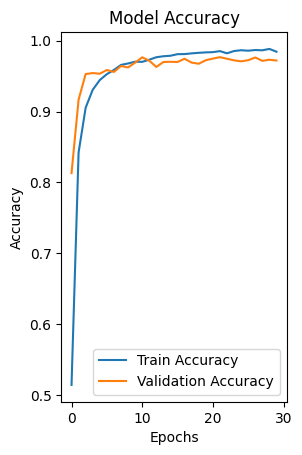

In [ ]:
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

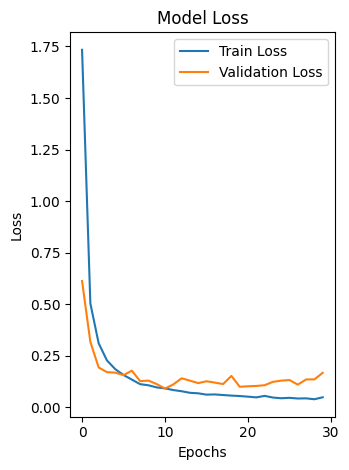

In [ ]:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
plot_history(history)

<Figure size 1200x400 with 0 Axes>

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


In [ ]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)


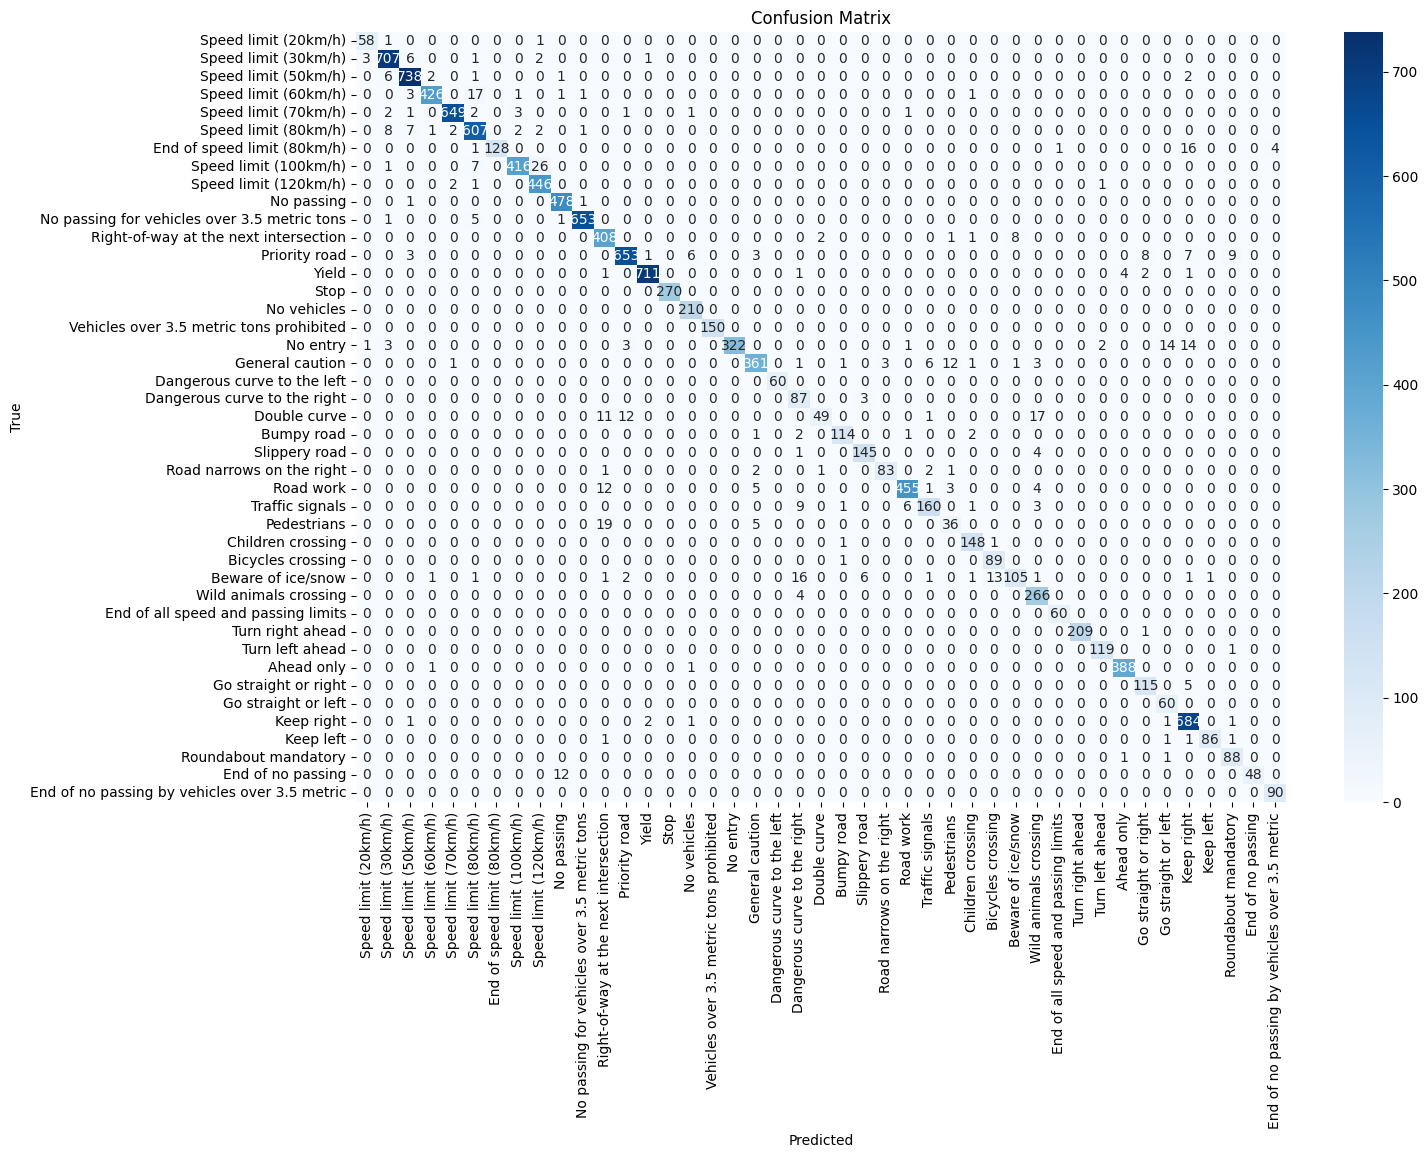

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=signnames['SignName'],
            yticklabels=signnames['SignName'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=signnames['SignName']))

Classification Report:
                                               precision    recall  f1-score   support

                         Speed limit (20km/h)       0.94      0.97      0.95        60
                         Speed limit (30km/h)       0.97      0.98      0.98       720
                         Speed limit (50km/h)       0.97      0.98      0.98       750
                         Speed limit (60km/h)       0.99      0.95      0.97       450
                         Speed limit (70km/h)       0.99      0.98      0.99       660
                         Speed limit (80km/h)       0.94      0.96      0.95       630
                  End of speed limit (80km/h)       1.00      0.85      0.92       150
                        Speed limit (100km/h)       0.99      0.92      0.95       450
                        Speed limit (120km/h)       0.94      0.99      0.96       450
                                   No passing       0.97      1.00      0.98       480
 No passing for veh